In [1]:
import numpy as np
import scipy as sc
from scipy.optimize import curve_fit as cf
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def sixth_order(x, a, b, c, d, e, f, g):
    return a * pow(x,6) + b * pow(x,5) + c * pow(x,4) + d* pow(x,3) + e * pow(x,2) + f * pow(x,1) + g

def seventh_order(x, a, b, c, d, e, f, g, h):
    return sixth_order(x, a, b, c, d, e, f, g) * x + h

Current conversion: converted = ((raw / 1024) - 0.2) * 5000


In [3]:
data = pd.read_csv("high_pt_characterization_10_10")

In [4]:
data['raw'] = (data[' converted'] / 5000 + 0.2) * 1024


In [5]:
data

,digital,converted,raw
0,700,580,323.584
1,730,615,330.752
2,0,15,207.872
3,150,100,225.280
4,805,665,340.992
5,890,740,356.352
6,990,820,372.736
7,1100,910,391.168
8,1200,980,405.504
9,1351,1120,434.176


In [6]:
res, cov = cf(seventh_order, data['raw'], data['digital'])

In [7]:
res

array([ 4.81649341e-16, -2.08701274e-12,  3.74338127e-09, -3.58936995e-06,
        1.97860885e-03, -6.23995436e-01,  1.09627235e+02, -8.18065444e+03])

In [8]:
x = np.linspace(0,5000)
p = sixth_order(x, res[0], res[1], res[2], res[3], res[4], res[5], res[6])

In [9]:
sixth_order(3100, res[0], res[1], res[2], res[3], res[4], res[5], res[6])

85939.40880524958

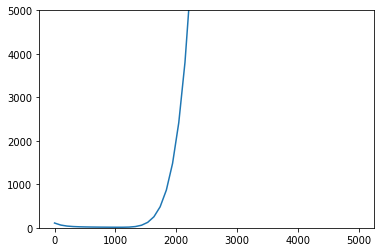

In [10]:
plt.ylim(0, 5000)
plt.plot(x, p)

In [11]:
f = interp1d(data[' converted'], data['digital'], kind='quadratic')

In [12]:
f(800)

array(964.92102331)

In [13]:
f(1800)

array(2180.)